In [1]:
import pandas as pd
from brainclip.config import *
import os
import SimpleITK as sitk

parsed_reports_df = pd.read_csv(parsed_reports_ext)

In [2]:
def extract_info(basepath):
    r = []
    for img_path in os.listdir(basepath):
        img = sitk.ReadImage(os.path.join(basepath, img_path))
        spacing = img.GetSpacing()[:3]
        r.append(spacing)
    return pd.DataFrame(r, columns=["x","y","z"])

In [3]:
train = extract_info(train_data)
train["set"] = "train"

valid = extract_info(valid_data)
valid["set"] = "valid"

test = extract_info(test_data)
test["set"] = "test"

In [4]:
total = pd.concat([train,valid,test])

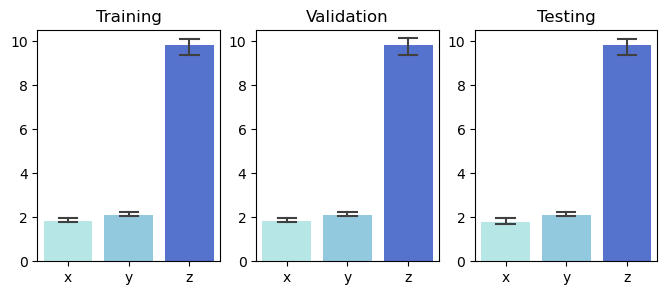

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = sns.color_palette(['paleturquoise', 'skyblue', 'royalblue'])
fig, ax = plt.subplots(1,3, figsize=(8,3))

for i, df in zip([0,1,2], [train,valid,test]):
    sns.barplot(df, ax=ax[i], 
        errorbar=("pi", 50), capsize=.3, errcolor=".25", errwidth=1.5,
        linewidth=0, edgecolor=".5", palette=custom_palette)

for i in range(3):
    ax[i].set_ylim(0, 10.5)

ax[0].set_title("Training")
ax[1].set_title("Validation")
ax[2].set_title("Testing")
plt.show()

In [7]:
total_l = []
for row in parsed_reports_df["ParsedImpressions"]:
    total_l.append( len(row) )

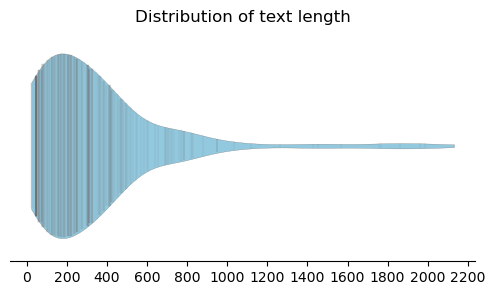

In [19]:
plt.figure(figsize=(6, 3))
sns.violinplot(total_l, orient="h", cut=0, inner="stick",linewidth=0.2, color="skyblue")
plt.title("Distribution of text length")
plt.yticks([])
plt.xticks([i for i in range(0,2300, 200)])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)